# Importing Necessary Libraries

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


# Data Set - Book

---



In [ ]:
df=pd.read_csv("/content/book.csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Problem Statement

---



>Prepare rules for the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots 


# EDA

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.columns.to_list()

['ChildBks',
 'YouthBks',
 'CookBks',
 'DoItYBks',
 'RefBks',
 'ArtBks',
 'GeogBks',
 'ItalCook',
 'ItalAtlas',
 'ItalArt',
 'Florence']

In [ ]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [ ]:
for col in df:
    print(f'{col}: {df[col].unique()}')

ChildBks: [0 1]
YouthBks: [1 0]
CookBks: [0 1]
DoItYBks: [1 0]
RefBks: [0 1]
ArtBks: [0 1]
GeogBks: [1 0]
ItalCook: [0 1]
ItalAtlas: [0 1]
ItalArt: [0 1]
Florence: [0 1]


# Apriori Algorithm 

---



---



## Different Values for Support and Confidence

In [ ]:
#Defining necessary function for the association rules
def rules(df,confidence,support):
    ap = {}
    for i in confidence:
        frequent_itemsets =apriori(df,min_support=support,use_colnames=True)
        rule = association_rules(frequent_itemsets,min_threshold=i)
        ap[i] = len(rule.antecedents) #will show the number of rules
    return pd.Series(ap).to_frame("Support: %s"%support)

In [ ]:
#defining different values of support and confidence
support = [0.001,0.005,0.01,0.05,0.1]
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [ ]:
# finding the number of rules for the different values of support and confidence
confs = []
for i in support:
    ap_i1 = rules(df,confidence=confidence,support=i)
    confs.append(ap_i1)

In [ ]:
all_confs= pd.concat(confs,axis=1)
all_confs

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,110800,26603,9079,662,100
0.2,75765,20533,7156,599,100
0.3,54271,15735,5532,478,89
0.4,41693,11771,4285,371,70
0.5,32173,8981,3272,260,49
0.6,21440,5582,2179,135,30
0.7,12983,3818,1459,87,19
0.8,9918,2750,1004,62,6
0.9,7409,1657,563,10,1


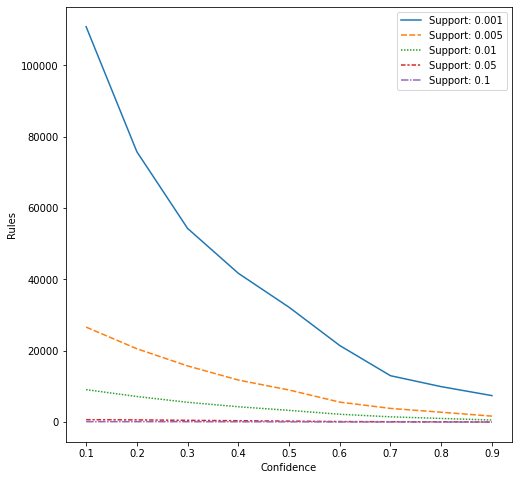

In [ ]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_confs)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

### Conclusion:

As seen in the plot, the number of rules decreases as the value of support and confidence increases

## Specific Value For Associative Rules

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


> We can interpret our resulting table as follows. You can write the different situations you see in the table as comments :)

* Support Value -> shows that The rate of seeing (YouthBks) and (ChildBks) together in all purchases is 0.165.

* Confidence Value -> shows that 67% of customers who buy (YouthBks) also buy (ChildBks).

* Lift Value -> shows that Sales of (ChildBks) increase by 1.58 for purchases with (YouthBks).

In [ ]:
print("There are {} Relation derived.".format(len(rules)))

There are 100 Relation derived.


In [ ]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
20,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
21,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000


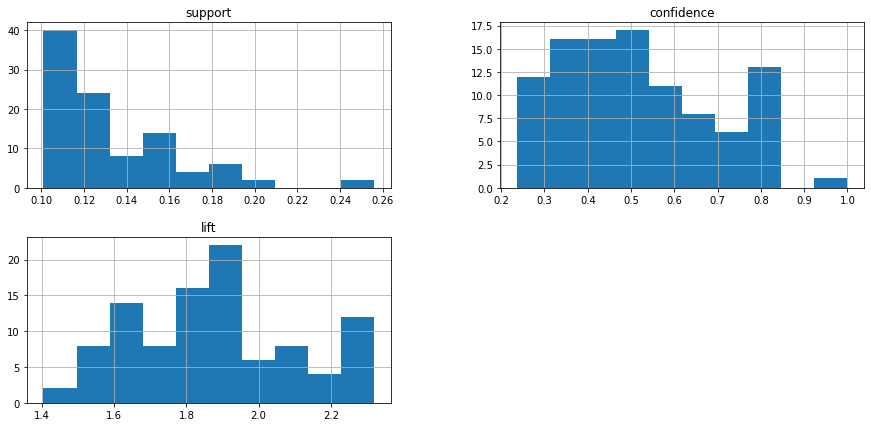

In [ ]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

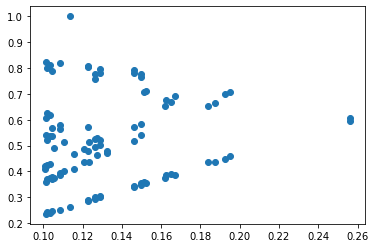

In [ ]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


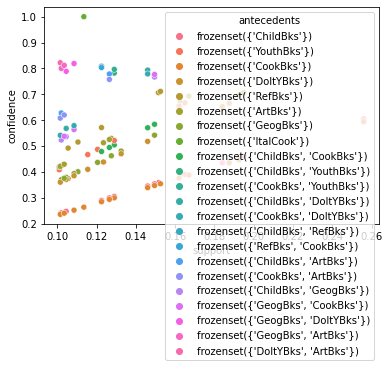

In [ ]:
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')
plt.show()